In [10]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## QNN

### Fitting Gaussian

In [20]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=1, scale=2*np.pi, backend=backend, shots=10000)
layer2 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=2*np.pi, backend=backend, shots=10000)
layer3 = QLayer(n_qubits=3, n_features=3, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)


layers = [layer1, layer2, layer3]

optimizer = Adam(lr=0.1)
network = NeuralNetwork(layers, optimizer)

<IPython.core.display.Javascript object>


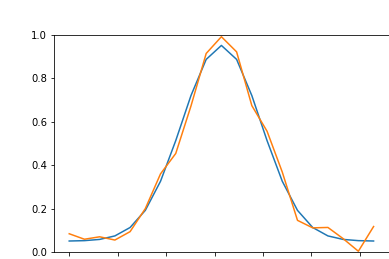

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
x = np.linspace(0, np.pi, 21).reshape(-1,1)
y = 0.9*np.exp(-3*(x-np.pi/2)**2) + 0.05

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(100)):
    network.backward(x, y)
    network.step()
    y_pred = network.predict(x)
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

### Loss Curve

In [18]:
plt.plot(network.loss)
plt.show()

AttributeError: 'NeuralNetwork' object has no attribute 'loss'

### Derivative

In [19]:
y_pred = network.predict(x)
deriv = network.deriv(x)

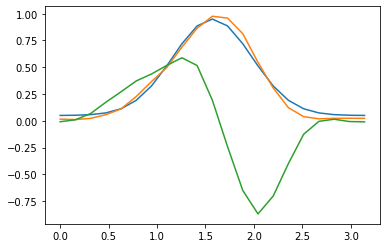

In [12]:
plt.plot(x,y)
plt.plot(x,y_pred)
plt.plot(x, deriv)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

plt.plot(y_pred)
plt.plot(deriv)
fig.canvas.draw()

In [ ]:
print(network.layers[2].weight)

### Sequential

In [ ]:
np.random.seed(42)
network = sequential_qnn(q_bits = [1, 3, 3],
                         dim = [1, 3, 3, 1],
                         reps=1,
                         backend = backend,
                         shots = 10000)

In [ ]:
x = np.linspace(0, np.pi, 21).reshape(-1,1)
y = 0.9*np.exp(-3*(x-np.pi/2)**2) + 0.05

#network.train(x, y, epochs=100, verbose=True)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(100)):
    network.backward(x, y)
    network.step()
    y_pred = network.predict(x)
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Chaotic

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer2 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer3 = QLayer(n_qubits=3, n_features=3, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=2000)


layers = [layer1, layer2, layer3]

optimizer = Adam(lr=0.01)
network = NeuralNetwork(layers, optimizer)

In [ ]:
np.random.seed(42)
x = np.linspace(0, 1, 10).reshape(-1,1)
y = np.random.uniform(0, 1, 10).reshape(-1,1)

network.backward(x, y)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()



for i in tqdm(range(100)):
    
    y_pred = network.predict(x)
    
    network.backward(x, y)
    network.step()
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Sigmoid

<IPython.core.display.Javascript object>


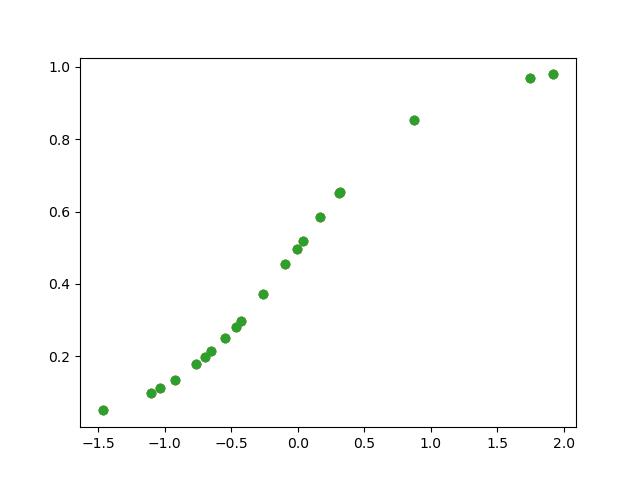

In [5]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1,1,1]).reshape(-1,1)

z = (x-np.pi/4)@beta
y = 1/(1+np.exp(-2*z))


plt.plot(z, y, "o")
plt.show()

In [13]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=50, verbose=True)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0, loss: 0.1540848948419883
epoch: 1, loss: 0.13078520402012128
epoch: 2, loss: 0.1060217307962942
epoch: 3, loss: 0.08527212309851803
epoch: 4, loss: 0.06751532493051143
epoch: 5, loss: 0.05741064956476821
epoch: 6, loss: 0.053555560519287115
epoch: 7, loss: 0.051145931605612316
epoch: 8, loss: 0.048873998829190544
epoch: 9, loss: 0.044006559389949636
epoch: 10, loss: 0.03792096281761428
epoch: 11, loss: 0.03227286499576244
epoch: 12, loss: 0.02876829988473662
epoch: 13, loss: 0.026937914203234742
epoch: 14, loss: 0.02601163162918252
epoch: 15, loss: 0.02567329022683048
epoch: 16, loss: 0.024740814764113703
epoch: 17, loss: 0.024774067299133992
epoch: 18, loss: 0.024453398651559315
epoch: 19, loss: 0.0237622479316384
epoch: 20, loss: 0.023293371680068616
epoch: 21, loss: 0.02259400688568914
epoch: 22, loss: 0.02184087071099771
epoch: 23, loss: 0.02180292368708419
epoch: 24, loss: 0.021367819621152674
epoch: 25, loss: 0.020177581487129448
epoch: 26, loss: 0.019125893725577985
ep

In [14]:
y_pred = model.predict(x)

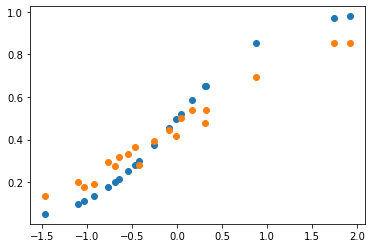

In [15]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### ReLu

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = z*(0<z).astype(float)+0.1

#plt.plot(z, y, "o")
#plt.show()

In [ ]:
np.random.seed(39)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=3, scale=1, backend=backend, shots=1000)
layers = [layer1]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(200)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Radial Basis

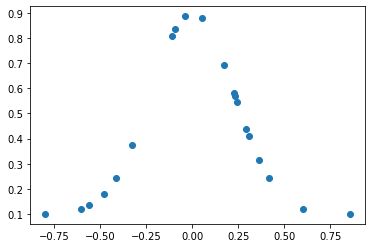

In [16]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = 0.8*np.exp(-(z**2)/0.1) + 0.1

plt.plot(z, y, "o")
plt.show()

In [20]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07512168236458519
epoch: 1, loss: 0.06981640112730973
epoch: 2, loss: 0.06564535426760079
epoch: 3, loss: 0.06375630108674755
epoch: 4, loss: 0.06297326853686722
epoch: 5, loss: 0.06133892611100209
epoch: 6, loss: 0.0610956894450546
epoch: 7, loss: 0.05836238208942881
epoch: 8, loss: 0.058357598383722384
epoch: 9, loss: 0.05960269312189629
epoch: 10, loss: 0.05937978862353686
epoch: 11, loss: 0.05821430221724133
epoch: 12, loss: 0.05775286620994361
epoch: 13, loss: 0.05799569968876049
epoch: 14, loss: 0.05736535929955585
epoch: 15, loss: 0.05588276509193074
epoch: 16, loss: 0.05469768434839075
epoch: 17, loss: 0.05275415633017977
epoch: 18, loss: 0.05164125418680578
epoch: 19, loss: 0.05078487589274701
epoch: 20, loss: 0.04971360880422605
epoch: 21, loss: 0.048828636629530735
epoch: 22, loss: 0.047567317067497214
epoch: 23, loss: 0.04859069031416308
epoch: 24, loss: 0.049139443547478595
epoch: 25, loss: 0.04971697990368954
epoch: 26, loss: 0.04965169716737804
epoch: 2

In [21]:
y_pred = model.predict(x)

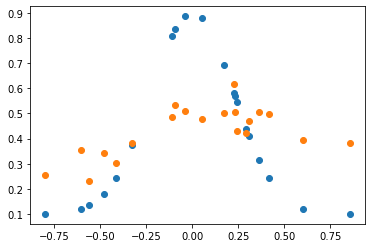

In [22]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### Classical NN

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
#z = (x-np.pi/4)@beta

z = x@beta
#y = 1/(1+np.exp(-3*z))

y = 0.8*np.exp(-(z**2)/0.1) + 0.1
#y = z*(0<z).astype(float)+0.1


x = torch.tensor(x, dtype = torch.float, requires_grad=False)
y = torch.tensor(y, dtype = torch.float, requires_grad=False)

model = Model()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(200)):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    print(loss.detach())
    optimizer.step()
    
    ax.clear()
    ax.plot(z, y.detach(), "o")
    ax.plot(z, y_pred.detach(), "o")
    ax.set_ylim([-0.2, 1.2])
    fig.canvas.draw()

#### Ost

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = CLayer(n_inputs=1, n_outputs=3, scale = 1, activation = torch.tanh)
layer2 = CLayer(n_inputs=3, n_outputs=1, scale = 1, activation = torch.tanh)
layers = [layer1, layer2]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
x = np.linspace(0, 1, 10).reshape(-1,1)
y = 0.9*np.exp(-10*(x-0.5)**2)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(100)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()